In [86]:
# candlestick plot functions
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns


def create_candlestick_grid(data_list, rows, cols, filename='candlestick_grid.png'):
    sns.set(style="whitegrid")

    # Calculate figure size for office paper (8.5 x 11 inches) at 300 DPI
    fig_width = 8.5
    fig_height = 11
    dpi = 300

    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height), dpi=dpi)
    axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

    for ax, data in zip(axes, data_list):
        # Convert timestamp to datetime
        data = data.copy()
        data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
        
        # Prepare data for candlestick plotting
        btc_data = data[['timestamp', 'open (BTC)', 'high (BTC)', 'low (BTC)', 'close (BTC)']].copy()
        eth_data = data[['timestamp', 'open (ETH)', 'high (ETH)', 'low (ETH)', 'close (ETH)']].copy()
        
        # Convert timestamp to Matplotlib date format
        btc_data['timestamp'] = btc_data['timestamp'].apply(mdates.date2num)
        eth_data['timestamp'] = eth_data['timestamp'].apply(mdates.date2num)
        
        # Plot BTC candlestick chart
        candlestick_ohlc(ax, btc_data.values, width=0.01, colorup='green', colordown='red')
        ax.xaxis_date()
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        ax.set_title('BTC-USD')
        ax.set_ylabel('Price (BTC)')
        ax.set_xlabel('Time')
        plt.xticks(rotation=45)
    
    # Hide any remaining empty subplots
    for i in range(len(data_list), len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()
    

def create_dual_candlestick_plot(data, symbol1, symbol2, y_range1=None, y_range2=None):
    # Convert timestamp to datetime
    data = data.copy()
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
    
    # Prepare data for candlestick plotting
    symbol1_data = data[['timestamp', f'open ({symbol1})', f'high ({symbol1})', f'low ({symbol1})', f'close ({symbol1})']].copy()
    symbol2_data = data[['timestamp', f'open ({symbol2})', f'high ({symbol2})', f'low ({symbol2})', f'close ({symbol2})']].copy()
    
    # Convert timestamp to Matplotlib date format
    symbol1_data['timestamp'] = symbol1_data['timestamp'].apply(mdates.date2num)
    symbol2_data['timestamp'] = symbol2_data['timestamp'].apply(mdates.date2num)
    
    sns.set_theme(style="darkgrid")
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)
    
    # Plot symbol1 candlestick chart
    candlestick_ohlc(ax1, symbol1_data.values, width=0.01, colorup='green', colordown='red')
    ax1.xaxis_date()
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax1.set_title(f'{symbol1} Candlestick Chart')
    ax1.set_ylabel(f'Price ({symbol1})')
    
    # Set y-axis limits for symbol1 chart if provided
    if y_range1:
        ax1.set_ylim(y_range1)
    
    # Plot symbol2 candlestick chart
    candlestick_ohlc(ax2, symbol2_data.values, width=0.01, colorup='blue', colordown='orange')
    ax2.xaxis_date()
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax2.set_title(f'{symbol2} Candlestick Chart')
    ax2.set_ylabel(f'Price ({symbol2})')
    ax2.set_xlabel('Timestamp')
    
    # Set y-axis limits for symbol2 chart if provided
    if y_range2:
        ax2.set_ylim(y_range2)
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def create_minimal_candlestick_plot(data, symbol1, symbol2, y_range1=None, y_range2=None, output_dir='plots', sample_id=1, image_size=(64, 64)):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Convert timestamp to datetime
    data = data.copy()
    data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')
    
    # Prepare data for candlestick plotting
    symbol1_data = data[['timestamp', f'open ({symbol1})', f'high ({symbol1})', f'low ({symbol1})', f'close ({symbol1})']].copy()
    symbol2_data = data[['timestamp', f'open ({symbol2})', f'high ({symbol2})', f'low ({symbol2})', f'close ({symbol2})']].copy()
    
    # Convert timestamp to Matplotlib date format
    symbol1_data['timestamp'] = symbol1_data['timestamp'].apply(mdates.date2num)
    symbol2_data['timestamp'] = symbol2_data['timestamp'].apply(mdates.date2num)
    
    sns.set_theme(style="darkgrid")
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=image_size, dpi=100)
    ax1, ax2 = axes
    
    # Plot symbol1 candlestick chart
    candlestick_ohlc(ax1, symbol1_data.values, width=0.01, colorup='green', colordown='red')
    ax1.axis('off')  # Turn off axis labels, ticks, and grid
    if y_range1:
        ax1.set_ylim(y_range1)
    
    # Plot symbol2 candlestick chart
    candlestick_ohlc(ax2, symbol2_data.values, width=0.01, colorup='blue', colordown='orange')
    ax2.axis('off')  # Turn off axis labels, ticks, and grid
    if y_range2:
        ax2.set_ylim(y_range2)
    
    plt.subplots_adjust(wspace=0, hspace=0)  # Remove space between subplots
    plt.tight_layout(pad=0)  # Remove padding
    
    # Save the figure as an image file
    plot_filename = os.path.join(output_dir, f'candlestick_plot_{sample_id}.png')
    plt.savefig(plot_filename, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    
    return plot_filename


In [59]:
#get_market_data_for_symbols(list_of_symbols, timeframe):
import pandas as pd
from data_service import DataService


def get_market_data_for_symbols(list_of_symbols, timeframe):
    """queries all marketdata available in database for the selected symbols and timeframe

    Each series name includes symbol

        params:
            list_of_symbols: format like 'ETH-USDT'
            timeframe: format like '1min'

        return: list of marketdata dataframes, last element is merged dataframes
    """
    dataframes = []
    for symbol in list_of_symbols:
        df = DataService(symbol, timeframe).load_market_data()
        df.columns = [col + f" ({symbol.split("-")[0]})" if col != "timestamp" else col for col in df.columns]
        dataframes.append(df)
    
    for i in range(len(dataframes) - 1):
        df = pd.merge(df, dataframes[i], on='timestamp', how='inner')
    dataframes.append(df)
    return dataframes

In [60]:
#get_previous_candles(data, window_size=45):
def get_previous_candles(data, window_size=45, win_value=1):
    dataframes = []
    # Find the indices where 'win' column matches the win_value
    win_indices = data.index[data['win'] == win_value].tolist()
    
    for idx in win_indices:
        if idx >= window_size:
            # Extract the previous `window_size` rows excluding the originating row
            df = data.iloc[idx - window_size:idx].copy()
            dataframes.append(df)
    
    return dataframes


def get_previous_candles_wins_and_losses(data, window_size=45):
    dataframes = []
    
    for idx in range(len(data)):
        if idx >= window_size:
            # Extract the previous `window_size` rows excluding the originating row
            df = data.iloc[idx - window_size:idx].copy()
            dataframes.append(df)
    
    return dataframes


In [61]:
#get_following_candles(data, window_size=45):
def get_following_candles(data, window_size=45):
    dataframes = []
    # Find the indices where 'wins' column is 1
    win_indices = data.index[data['win'] == 1].tolist()
    
    for idx in win_indices:
        # Ensure there are enough rows after the current index
        if idx + 1 + window_size <= len(data):
            # Extract the following 45 rows, excluding the originating row, and make a copy to avoid SettingWithCopyWarning
            df = data.iloc[idx + 1:idx + 1 + window_size].copy()
            dataframes.append(df)
    
    return dataframes

In [62]:
# get market data for multiple symbols
df = get_market_data_for_symbols(['ETH-USDT', 'BTC-USDT'], "3min")[-1].head(20000)
display(df.columns)


Index(['id (BTC)', 'timestamp', 'open (BTC)', 'close (BTC)', 'high (BTC)',
       'low (BTC)', 'volume (BTC)', 'amount (BTC)', 'symbol (BTC)',
       'timeframe (BTC)', 'id (ETH)', 'open (ETH)', 'close (ETH)',
       'high (ETH)', 'low (ETH)', 'volume (ETH)', 'amount (ETH)',
       'symbol (ETH)', 'timeframe (ETH)'],
      dtype='object')

In [63]:
# drop cols
drop_cols = [col for col in df.columns 
           if 'id (' in col 
           or 'symbol (' in col 
           or 'timeframe (' in col]

df = df.drop(drop_cols, axis=1)
display(df)

timestamp  open (BTC)  close (BTC)  high (BTC)  low (BTC)  \
0      1627388460     37921.8      37993.0     38005.0    37921.7   
1      1627388640     37992.9      37981.3     38069.1    37953.0   
2      1627388820     37976.0      37989.6     38015.3    37963.3   
3      1627389000     37990.9      38081.1     38148.0    37956.4   
4      1627389180     38080.4      38252.7     38260.0    38074.8   
...           ...         ...          ...         ...        ...   
19995  1630987560     52613.0      52656.0     52661.2    52591.1   
19996  1630987740     52657.7      52650.9     52687.7    52648.4   
19997  1630987920     52649.9      52640.7     52659.5    52609.2   
19998  1630988100     52640.7      52654.5     52677.8    52636.7   
19999  1630988280     52654.5      52614.7     52656.8    52614.6   

       volume (BTC)   amount (BTC)  open (ETH)  close (ETH)  high (ETH)  \
0         12.430279  472068.436372     2269.54      2273.66     2275.24   
1          7.152814  271949.237565     2273.35      2272.92     2277.08   
2          5.819570  221064.718963     2272.18      2272.46     2275.39   
3         14.301592  544326.172536     2272.04      2277.76     2281.25   
4         21.509973  821417.451089     2277.76      2288.81     2289.50   
...             ...            ...         ...          ...         ...   
19995      7.258226  382062.914271     3909.05      3914.47     3914.47   
19996      6.138524  323315.744791     3914.52      3913.68     3916.05   
19997     10.193701  536454.484212     3913.68      3915.00     3915.00   
19998     14.241365  749856.138629     3915.00      3917.36     3920.11   
19999      4.291297  225902.550397     3917.36      3914.56     3918.03   

       low (ETH)  volume (ETH)   amount (ETH)  
0        2269.10    202.926697  461190.490193  
1        2271.57     70.050489  159372.123758  
2        2271.00     30.162256   68543.216371  
3        2270.61     80.891352  184225.258406  
4        2277.69    233.528651  533500.292762  
...          ...           ...            ...  
19995    3906.19     29.768013  116444.222380  
19996    3913.32     77.484745  303363.037949  
19997    3910.01     94.310158  368961.335480  
19998    3914.62     31.897826  124958.346216  
19999    3913.55     50.535450  197893.688591  

[20000 rows x 13 columns]

In [64]:
# find wins
from labeler import BinaryWinFinder 
win_finder = BinaryWinFinder(df, "ETH-USDT", "long", 40, 0.01)
df['win'] = win_finder.find_wins()

In [65]:
display(df)

timestamp  open (BTC)  close (BTC)  high (BTC)  low (BTC)  \
0      1627388460     37921.8      37993.0     38005.0    37921.7   
1      1627388640     37992.9      37981.3     38069.1    37953.0   
2      1627388820     37976.0      37989.6     38015.3    37963.3   
3      1627389000     37990.9      38081.1     38148.0    37956.4   
4      1627389180     38080.4      38252.7     38260.0    38074.8   
...           ...         ...          ...         ...        ...   
19995  1630987560     52613.0      52656.0     52661.2    52591.1   
19996  1630987740     52657.7      52650.9     52687.7    52648.4   
19997  1630987920     52649.9      52640.7     52659.5    52609.2   
19998  1630988100     52640.7      52654.5     52677.8    52636.7   
19999  1630988280     52654.5      52614.7     52656.8    52614.6   

       volume (BTC)   amount (BTC)  open (ETH)  close (ETH)  high (ETH)  \
0         12.430279  472068.436372     2269.54      2273.66     2275.24   
1          7.152814  271949.237565     2273.35      2272.92     2277.08   
2          5.819570  221064.718963     2272.18      2272.46     2275.39   
3         14.301592  544326.172536     2272.04      2277.76     2281.25   
4         21.509973  821417.451089     2277.76      2288.81     2289.50   
...             ...            ...         ...          ...         ...   
19995      7.258226  382062.914271     3909.05      3914.47     3914.47   
19996      6.138524  323315.744791     3914.52      3913.68     3916.05   
19997     10.193701  536454.484212     3913.68      3915.00     3915.00   
19998     14.241365  749856.138629     3915.00      3917.36     3920.11   
19999      4.291297  225902.550397     3917.36      3914.56     3918.03   

       low (ETH)  volume (ETH)   amount (ETH)  win  
0        2269.10    202.926697  461190.490193    1  
1        2271.57     70.050489  159372.123758    1  
2        2271.00     30.162256   68543.216371    1  
3        2270.61     80.891352  184225.258406    1  
4        2277.69    233.528651  533500.292762    1  
...          ...           ...            ...  ...  
19995    3906.19     29.768013  116444.222380    0  
19996    3913.32     77.484745  303363.037949    0  
19997    3910.01     94.310158  368961.335480    0  
19998    3914.62     31.897826  124958.346216    0  
19999    3913.55     50.535450  197893.688591    0  

[20000 rows x 14 columns]

In [66]:
wins = get_previous_candles(df)

In [67]:
print(wins[0].columns)

Index(['timestamp', 'open (BTC)', 'close (BTC)', 'high (BTC)', 'low (BTC)',
       'volume (BTC)', 'amount (BTC)', 'open (ETH)', 'close (ETH)',
       'high (ETH)', 'low (ETH)', 'volume (ETH)', 'amount (ETH)', 'win'],
      dtype='object')


In [68]:
# apply scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
cols_to_scale = [
                'open (BTC)', 'close (BTC)', 'high (BTC)', 'low (BTC)',
                'volume (BTC)', 'amount (BTC)', 'open (ETH)', 'close (ETH)',
                'high (ETH)', 'low (ETH)', 'volume (ETH)', 'amount (ETH)',
                ]

scaler = RobustScaler()
scaler_name = scaler.__class__.__name__

for df in wins:
    for col in cols_to_scale:
        if col in df.columns:
            df[col + "_" + scaler_name] = scaler.fit_transform(df[[col]])
        else:
            print(f"Warning: {col} not found in DataFrame")

In [69]:

for df in wins:
    # Identify the scaler columns
    scaler_cols = [col for col in df.columns if "Scaler" in col]
    
    # Extract the scaled columns
    scaled_cols = df[scaler_cols].copy()
    
    # Drop the scaler columns from the DataFrame
    df.drop(columns=scaler_cols, inplace=True)
    
    # Replace the unscaled columns with the scaled columns
    for col in df.columns:
        for scaler_col in scaler_cols:
            if col in scaler_col:
                df[col] = scaled_cols[scaler_col]
                break


In [70]:
display(wins[0])

timestamp  open (BTC)  close (BTC)  high (BTC)  low (BTC)  volume (BTC)  \
1   1627388640   -0.987408    -1.073220   -1.594620  -0.837037     -0.559756   
2   1627388820   -1.033671    -1.049294   -1.848513  -0.810728     -0.652851   
3   1627389000   -0.992883    -0.785529   -1.222275  -0.828352     -0.060586   
4   1627389180   -0.747878    -0.290862   -0.693723  -0.525926      0.442745   
5   1627389360   -0.276211    -0.246469   -0.321378  -0.090932      0.642383   
6   1627389540   -0.233780    -0.137504   -0.188768  -0.032184     -0.368373   
7   1627389720   -0.132768    -0.213606   -0.251534  -0.012005     -0.343122   
8   1627389900   -0.202573     0.077256   -0.056159  -0.249298      0.259357   
9   1627390080    0.081577     0.279619    0.250590   0.248531      0.228262   
10  1627390260    0.266356     0.053618    0.419538   0.212261      0.105788   
11  1627390440    0.063783    -0.053906    0.095800   0.095530     -0.128023   
12  1627390620   -0.051465     0.000000    0.086833   0.128480     -0.286159   
13  1627390800    0.000000     0.222254    0.183105   0.057471     -0.237940   
14  1627390980    0.211059     0.106371    0.306277   0.241890     -0.385960   
15  1627391160    0.100739    -0.072067    0.000000   0.051596     -0.423063   
16  1627391340   -0.068163     0.012684   -0.091553   0.028863      0.064028   
17  1627391520    0.016151    -0.196310   -0.172251  -0.001788     -0.495309   
18  1627391700   -0.197646    -0.398962   -0.521944  -0.256960      0.428341   
19  1627391880   -0.378319    -0.061978   -0.205286  -0.183908     -0.247420   
20  1627392060   -0.023816     0.189103    0.094856   0.125926     -0.116373   
21  1627392240    0.179578     0.154223    0.220859   0.318263     -0.586537   
22  1627392420    0.146455     0.214471    0.160925   0.273308     -0.622416   
23  1627392600    0.203668     0.100317    0.130250   0.135121      0.000000   
24  1627392780    0.095264     0.575382    0.778669   0.275096      0.231039   
25  1627392960    0.548043     1.032862    1.587541   0.626820      0.713841   
26  1627393140    0.973720     0.921880    1.706937   0.961686      0.844529   
27  1627393320    0.875445     0.849236    1.660689   0.814815      1.479129   
28  1627393500    0.806460     0.737965    1.263332   0.764496      0.876678   
29  1627393680    0.700794     0.839723    1.122699   0.813282     -0.445069   
30  1627393860    0.793868     0.362641    1.143464   0.391571      2.342199   
31  1627394040    0.344101     0.450274    0.621992   0.465645     -0.158760   
32  1627394220    0.427320     0.308158    0.484663   0.450830     -0.472803   
33  1627394400    0.292362     0.011531    0.623407   0.049298      0.833687   
34  1627394580    0.011224    -0.853848   -0.178858  -0.751469      1.496518   
35  1627394760   -0.796332    -1.358605   -1.175555  -1.202810      2.806462   
36  1627394940   -1.290172    -1.474777   -1.955639  -1.125415      0.046599   
37  1627395120   -1.402956    -1.742001   -2.304861  -1.374968      1.184350   
38  1627395300   -1.659732    -1.436149   -2.436999  -1.366794     -0.148823   
39  1627395480   -1.344922    -1.173537   -2.173195  -1.094764     -0.061892   
40  1627395660   -1.119628    -1.124243   -1.873525  -0.887101     -0.014081   
41  1627395840   -1.059129    -1.159700   -2.006607  -1.091699     -0.209585   
42  1627396020   -1.091979    -1.002306   -1.763096  -0.955556      0.211078   
43  1627396200   -0.951547     0.139810    0.266635  -0.701660      3.410719   
44  1627396380    0.145634     0.005765   -0.000944   0.000000      0.723861   
45  1627396560    0.005475    -0.144134    0.042473  -0.069221      1.181473   

    amount (BTC)  open (ETH)  close (ETH)  high (ETH)  low (ETH)  \
1      -0.559239   -0.714722    -0.827477   -1.174689  -0.670042   
2      -0.651020   -0.747222    -0.842039   -1.244813  -0.687016   
3      -0.067950   -0.751111    -0.674264   -1.001660  -0.698630   
4       0.431842   -0.592222    -0.324470   -0.65933

In [71]:
# save to db
data_service = DataService("ETH-USDT", "3min")
data_service.save_dataframes_to_db(wins, schema="temp", table_prefix="wins")


Error saving table wins1 in schema temp: (psycopg2.errors.InvalidSchemaName) schema "temp" does not exist
LINE 2: CREATE TABLE temp.wins1 (
                     ^

[SQL: 
CREATE TABLE temp.wins1 (
	timestamp BIGINT, 
	"open (BTC)" FLOAT(53), 
	"close (BTC)" FLOAT(53), 
	"high (BTC)" FLOAT(53), 
	"low (BTC)" FLOAT(53), 
	"volume (BTC)" FLOAT(53), 
	"amount (BTC)" FLOAT(53), 
	"open (ETH)" FLOAT(53), 
	"close (ETH)" FLOAT(53), 
	"high (ETH)" FLOAT(53), 
	"low (ETH)" FLOAT(53), 
	"volume (ETH)" FLOAT(53), 
	"amount (ETH)" FLOAT(53), 
	win INTEGER
)

]
(Background on this error at: https://sqlalche.me/e/20/f405)
Error saving table wins2 in schema temp: (psycopg2.errors.InvalidSchemaName) schema "temp" does not exist
LINE 2: CREATE TABLE temp.wins2 (
                     ^

[SQL: 
CREATE TABLE temp.wins2 (
	timestamp BIGINT, 
	"open (BTC)" FLOAT(53), 
	"close (BTC)" FLOAT(53), 
	"high (BTC)" FLOAT(53), 
	"low (BTC)" FLOAT(53), 
	"volume (BTC)" FLOAT(53), 
	"amount (BTC)" FLOAT(53), 
	"open 

In [72]:
def get_ranges(symbol, list_of_dataframes):
    range_max = float('-inf')
    range_min = float('inf')
    
    for df in list_of_dataframes:
        # Get the high and low columns for the symbol
        high_col = f"high ({symbol})"
        low_col = f"low ({symbol})"
        
        if high_col in df and low_col in df:
            # Update range_max and range_min
            range_max = max(range_max, df[high_col].max())
            range_min = min(range_min, df[low_col].min())
    
    return range_min, range_max

In [73]:
symbols = ["ETH", "BTC"]
range_a, range_b = [get_ranges(symbol, wins) for symbol in symbols]
print(symbols)
print(range_a, range_b)


['ETH', 'BTC']
(-8.555555555555555, 9.187353629976624) (-7.291183294663819, 10.595940959408795)


In [74]:
print(wins[0].columns)

Index(['timestamp', 'open (BTC)', 'close (BTC)', 'high (BTC)', 'low (BTC)',
       'volume (BTC)', 'amount (BTC)', 'open (ETH)', 'close (ETH)',
       'high (ETH)', 'low (ETH)', 'volume (ETH)', 'amount (ETH)', 'win'],
      dtype='object')


In [75]:
display(wins[0])

timestamp  open (BTC)  close (BTC)  high (BTC)  low (BTC)  volume (BTC)  \
1   1627388640   -0.987408    -1.073220   -1.594620  -0.837037     -0.559756   
2   1627388820   -1.033671    -1.049294   -1.848513  -0.810728     -0.652851   
3   1627389000   -0.992883    -0.785529   -1.222275  -0.828352     -0.060586   
4   1627389180   -0.747878    -0.290862   -0.693723  -0.525926      0.442745   
5   1627389360   -0.276211    -0.246469   -0.321378  -0.090932      0.642383   
6   1627389540   -0.233780    -0.137504   -0.188768  -0.032184     -0.368373   
7   1627389720   -0.132768    -0.213606   -0.251534  -0.012005     -0.343122   
8   1627389900   -0.202573     0.077256   -0.056159  -0.249298      0.259357   
9   1627390080    0.081577     0.279619    0.250590   0.248531      0.228262   
10  1627390260    0.266356     0.053618    0.419538   0.212261      0.105788   
11  1627390440    0.063783    -0.053906    0.095800   0.095530     -0.128023   
12  1627390620   -0.051465     0.000000    0.086833   0.128480     -0.286159   
13  1627390800    0.000000     0.222254    0.183105   0.057471     -0.237940   
14  1627390980    0.211059     0.106371    0.306277   0.241890     -0.385960   
15  1627391160    0.100739    -0.072067    0.000000   0.051596     -0.423063   
16  1627391340   -0.068163     0.012684   -0.091553   0.028863      0.064028   
17  1627391520    0.016151    -0.196310   -0.172251  -0.001788     -0.495309   
18  1627391700   -0.197646    -0.398962   -0.521944  -0.256960      0.428341   
19  1627391880   -0.378319    -0.061978   -0.205286  -0.183908     -0.247420   
20  1627392060   -0.023816     0.189103    0.094856   0.125926     -0.116373   
21  1627392240    0.179578     0.154223    0.220859   0.318263     -0.586537   
22  1627392420    0.146455     0.214471    0.160925   0.273308     -0.622416   
23  1627392600    0.203668     0.100317    0.130250   0.135121      0.000000   
24  1627392780    0.095264     0.575382    0.778669   0.275096      0.231039   
25  1627392960    0.548043     1.032862    1.587541   0.626820      0.713841   
26  1627393140    0.973720     0.921880    1.706937   0.961686      0.844529   
27  1627393320    0.875445     0.849236    1.660689   0.814815      1.479129   
28  1627393500    0.806460     0.737965    1.263332   0.764496      0.876678   
29  1627393680    0.700794     0.839723    1.122699   0.813282     -0.445069   
30  1627393860    0.793868     0.362641    1.143464   0.391571      2.342199   
31  1627394040    0.344101     0.450274    0.621992   0.465645     -0.158760   
32  1627394220    0.427320     0.308158    0.484663   0.450830     -0.472803   
33  1627394400    0.292362     0.011531    0.623407   0.049298      0.833687   
34  1627394580    0.011224    -0.853848   -0.178858  -0.751469      1.496518   
35  1627394760   -0.796332    -1.358605   -1.175555  -1.202810      2.806462   
36  1627394940   -1.290172    -1.474777   -1.955639  -1.125415      0.046599   
37  1627395120   -1.402956    -1.742001   -2.304861  -1.374968      1.184350   
38  1627395300   -1.659732    -1.436149   -2.436999  -1.366794     -0.148823   
39  1627395480   -1.344922    -1.173537   -2.173195  -1.094764     -0.061892   
40  1627395660   -1.119628    -1.124243   -1.873525  -0.887101     -0.014081   
41  1627395840   -1.059129    -1.159700   -2.006607  -1.091699     -0.209585   
42  1627396020   -1.091979    -1.002306   -1.763096  -0.955556      0.211078   
43  1627396200   -0.951547     0.139810    0.266635  -0.701660      3.410719   
44  1627396380    0.145634     0.005765   -0.000944   0.000000      0.723861   
45  1627396560    0.005475    -0.144134    0.042473  -0.069221      1.181473   

    amount (BTC)  open (ETH)  close (ETH)  high (ETH)  low (ETH)  \
1      -0.559239   -0.714722    -0.827477   -1.174689  -0.670042   
2      -0.651020   -0.747222    -0.842039   -1.244813  -0.687016   
3      -0.067950   -0.751111    -0.674264   -1.001660  -0.698630   
4       0.431842   -0.592222    -0.324470   -0.65933

KeyboardInterrupt: 

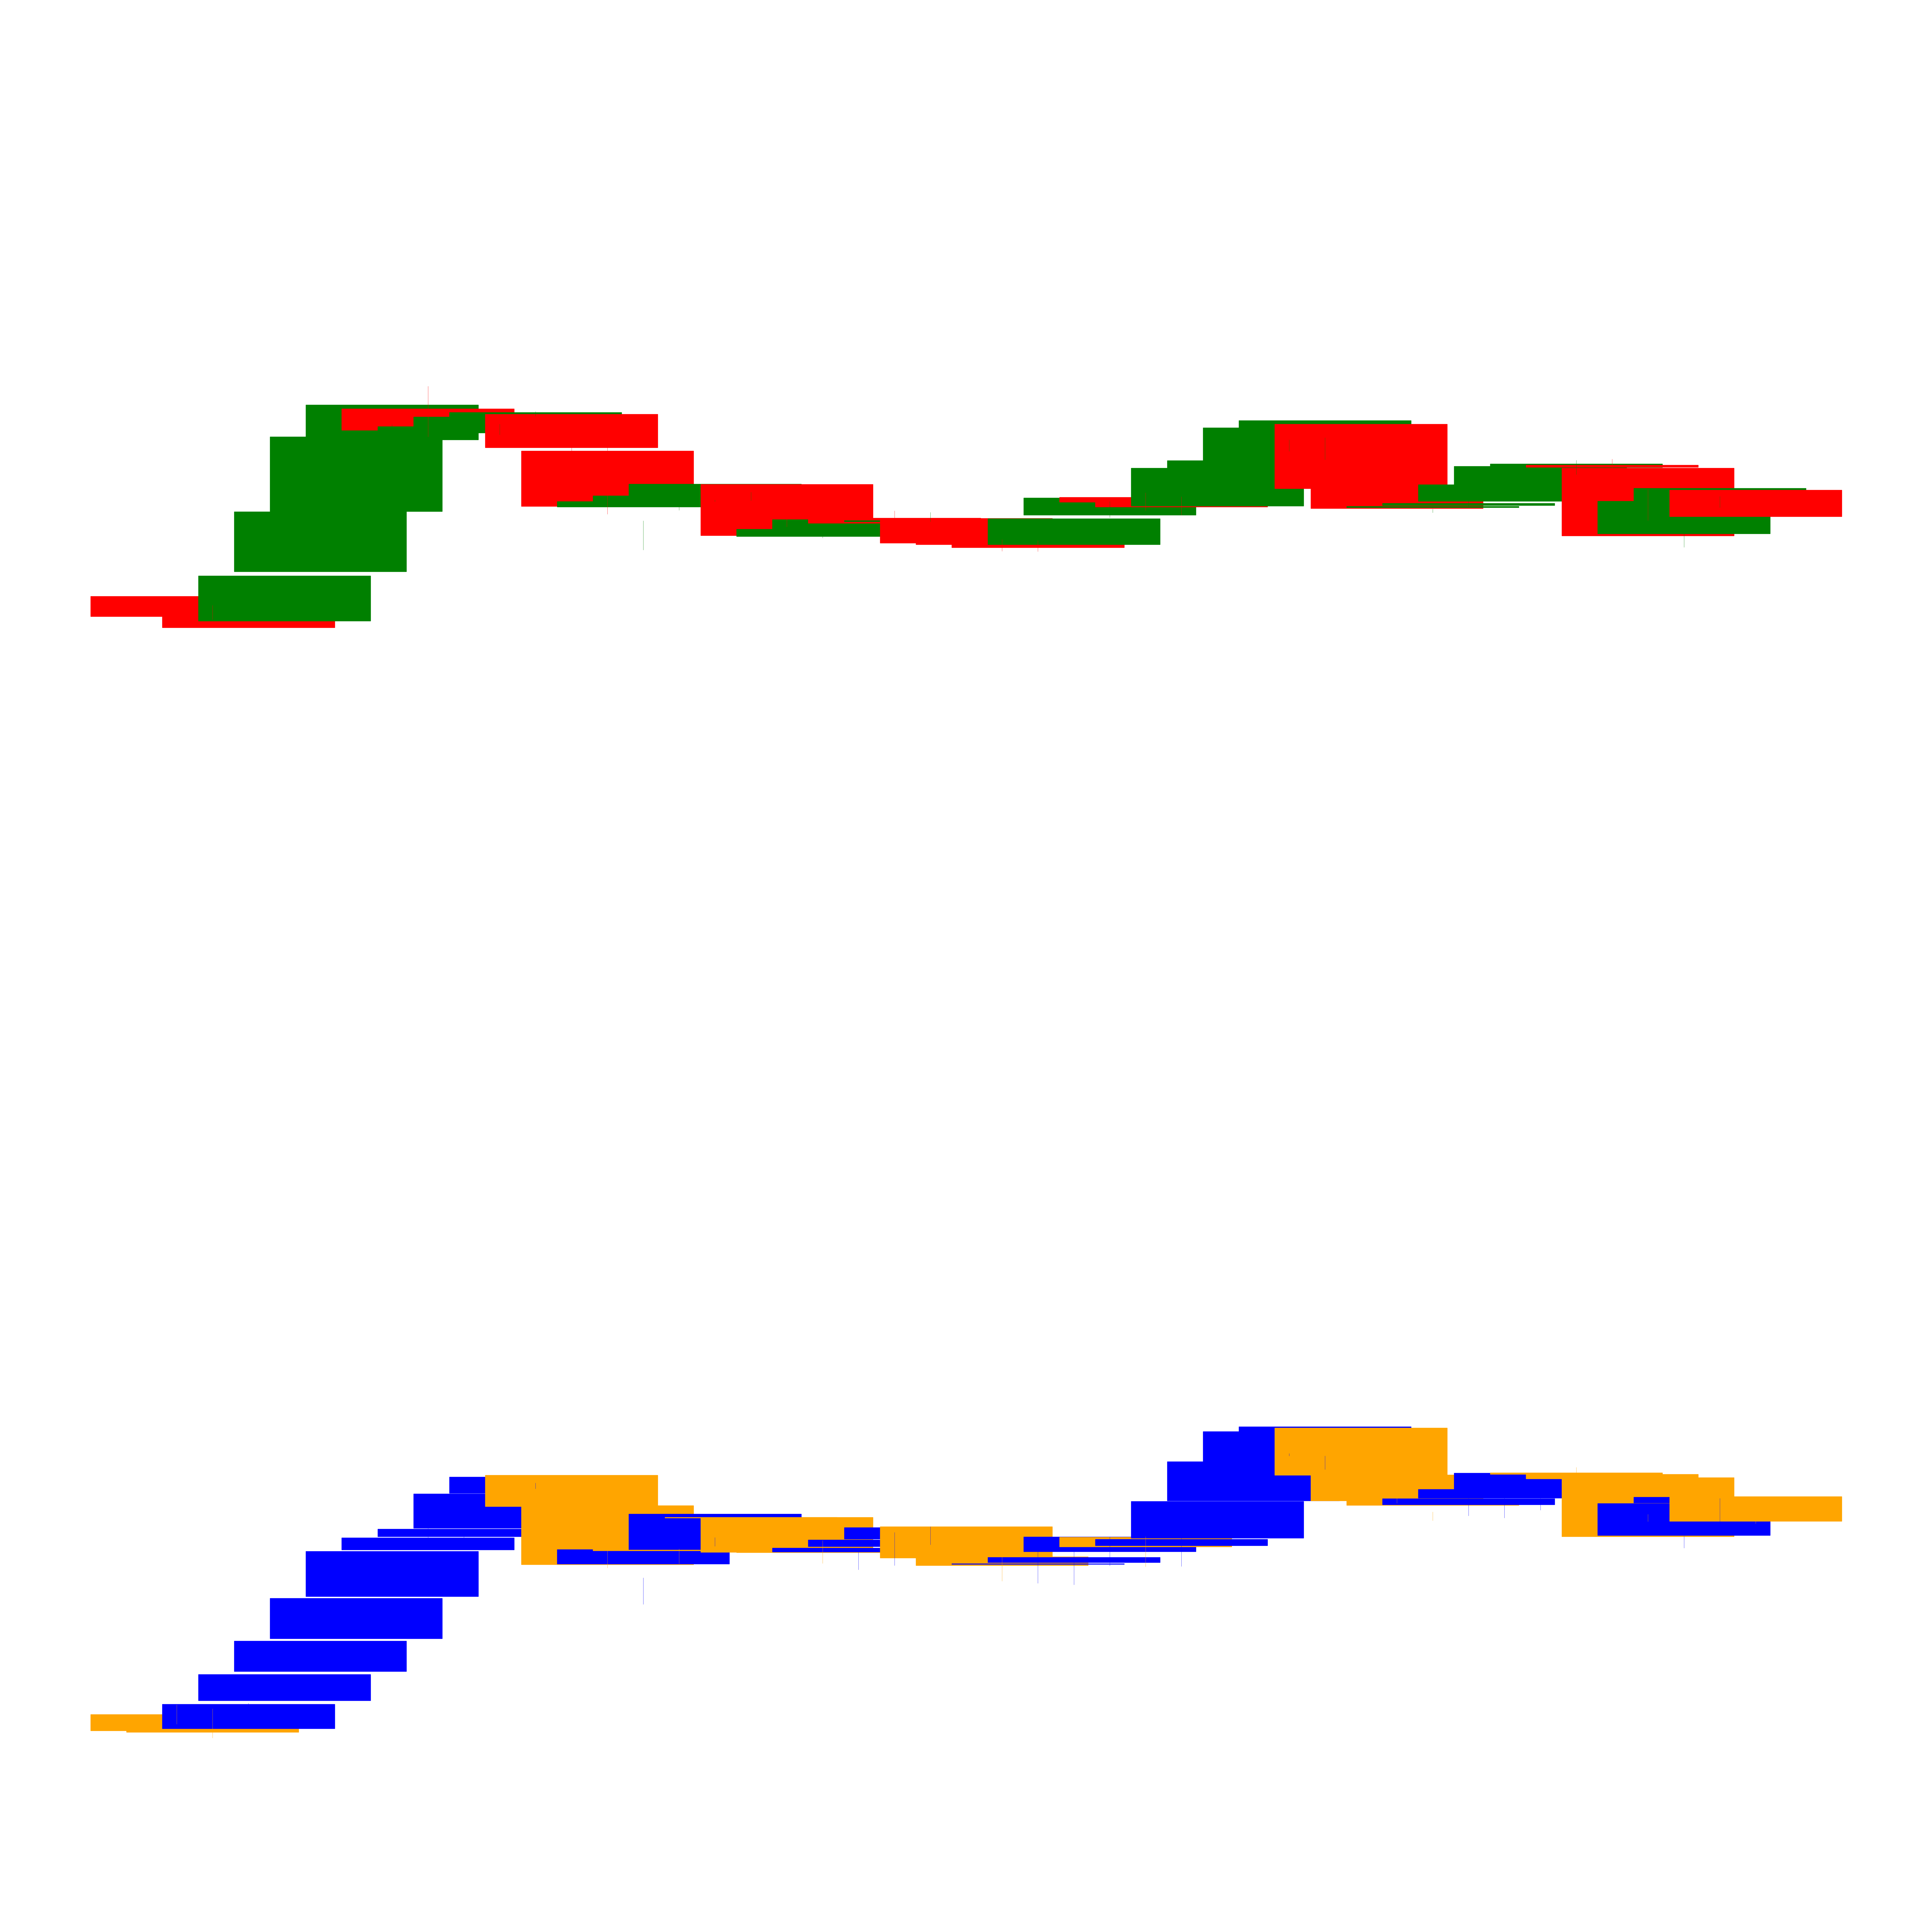

In [88]:
for i, df in enumerate(wins):
    create_minimal_candlestick_plot(df, symbols[0], symbols[1], range_a, range_b, output_dir="test", sample_id=i)

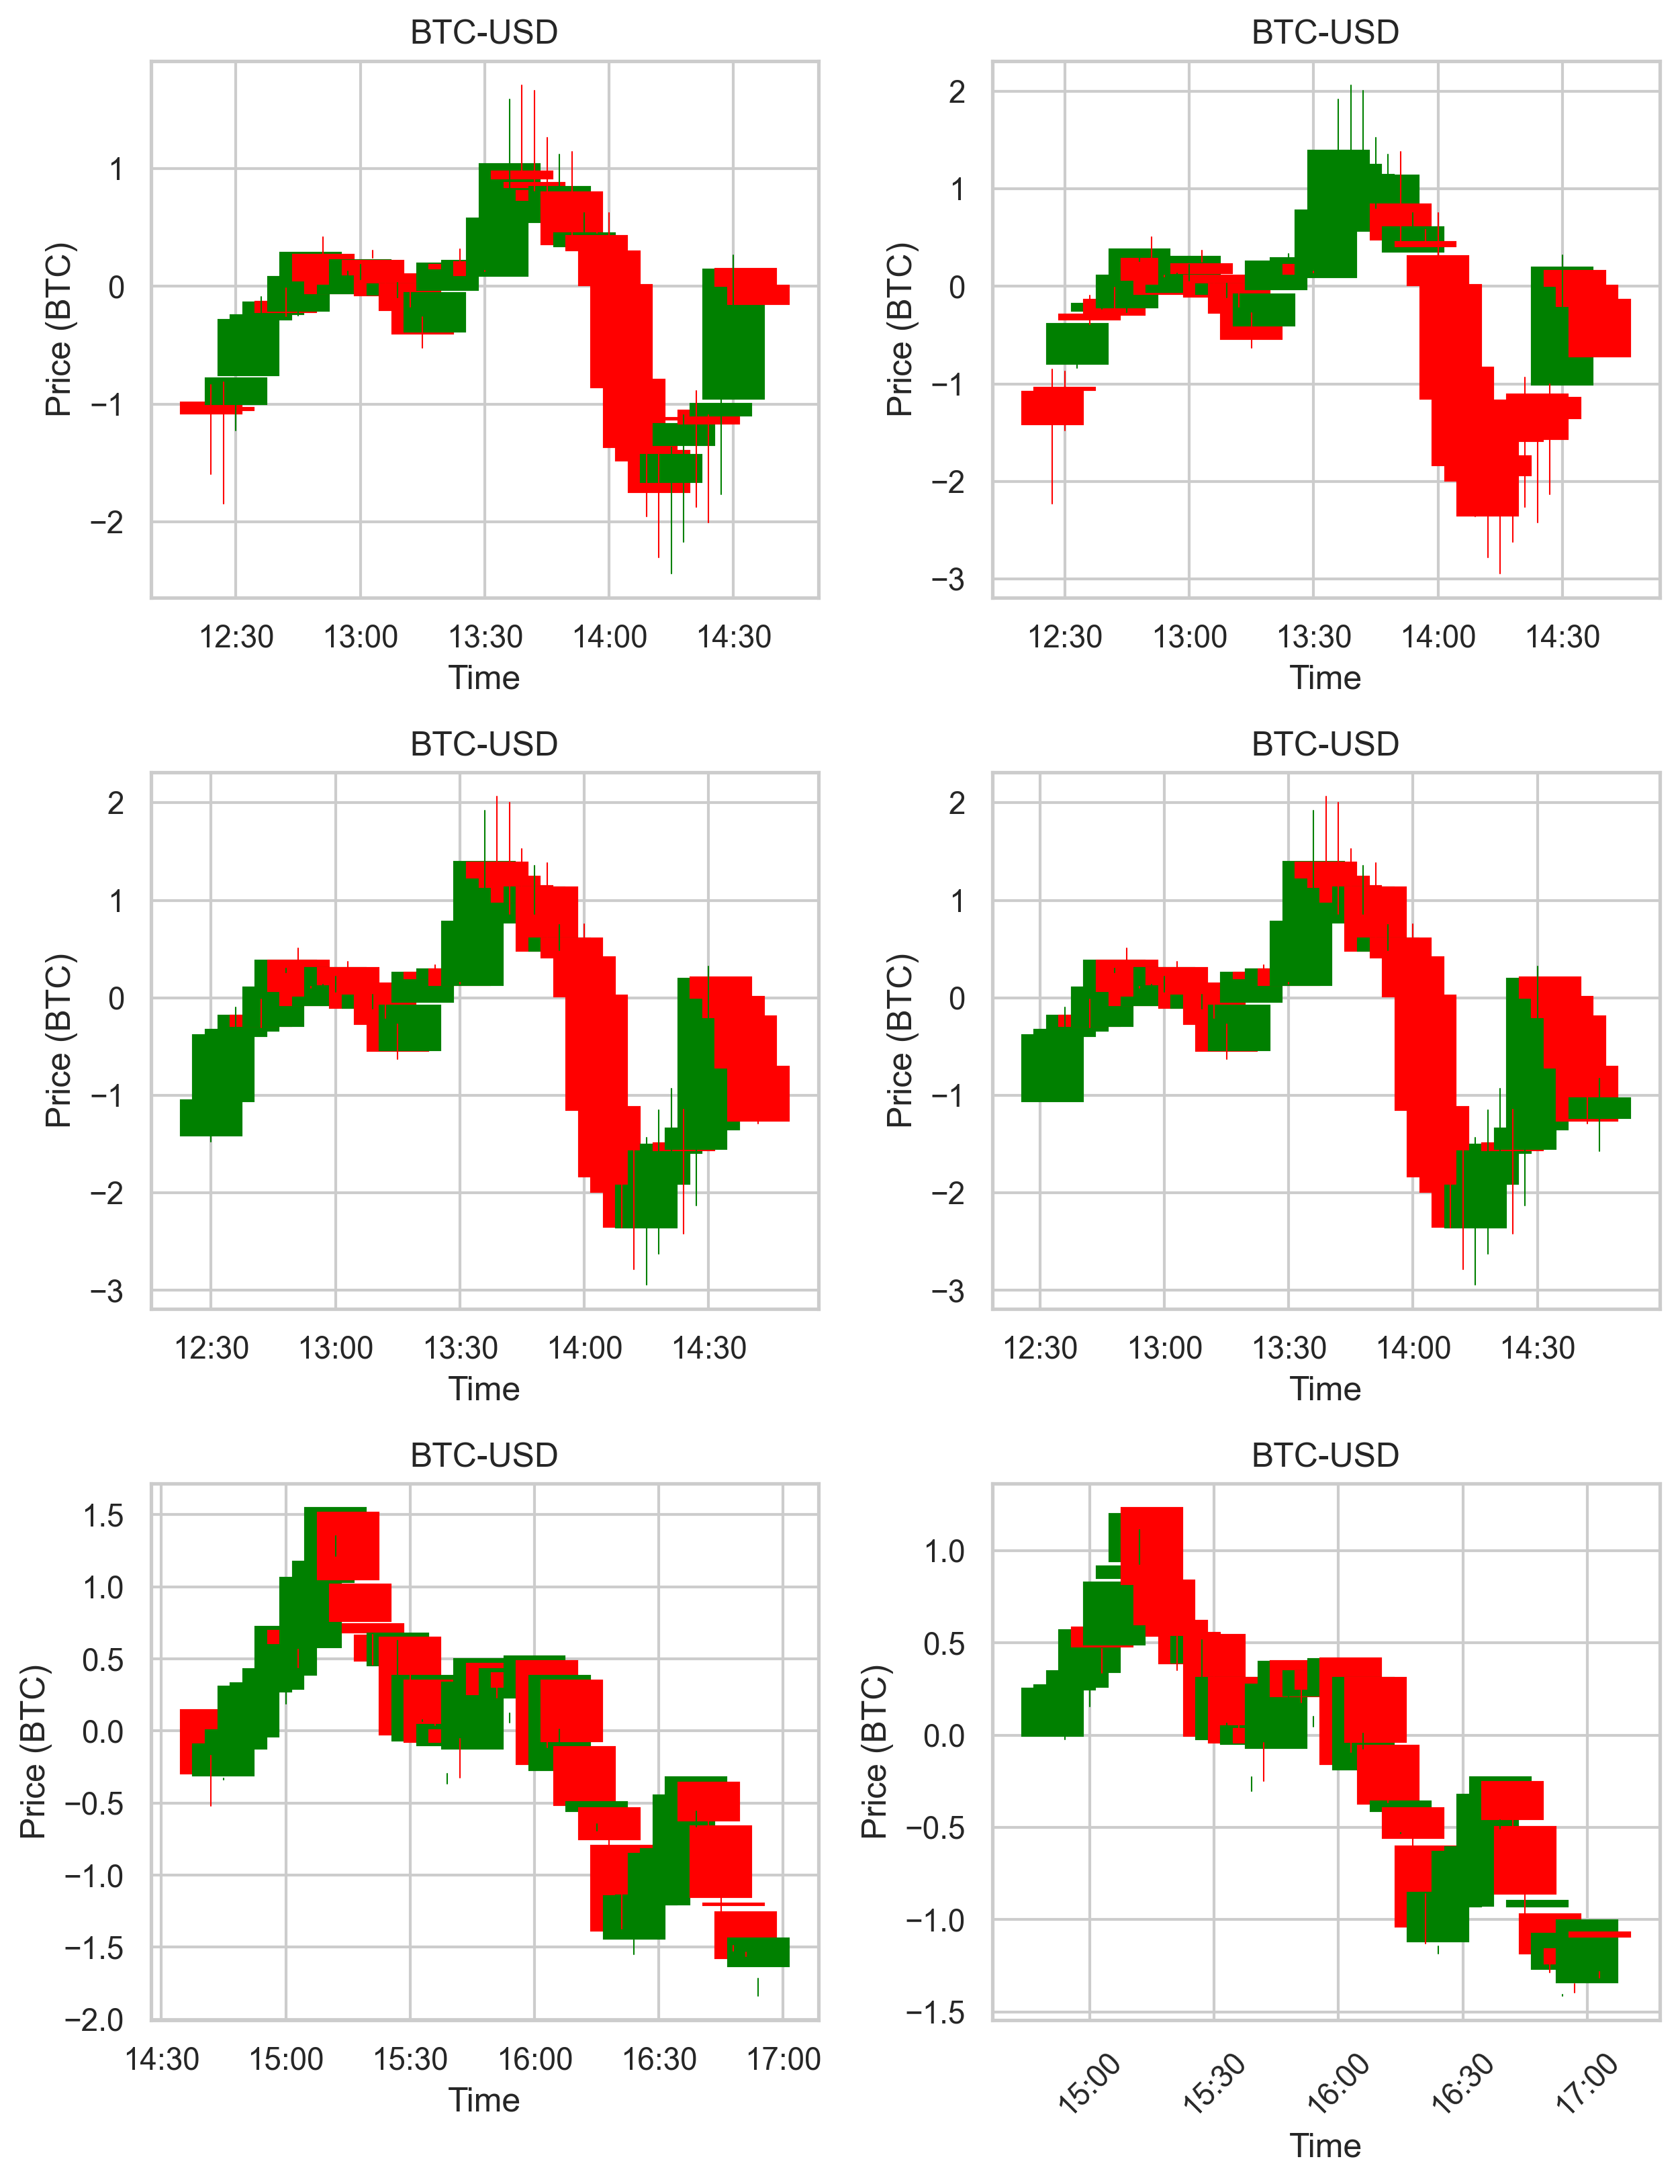

In [80]:
create_candlestick_grid(wins, 3, 2)